In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data/rainfall.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               54 non-null     object 
 1   rainfall           53 non-null     float64
 2   temperature        53 non-null     float64
 3   humidity           53 non-null     float64
 4   wind_speed         53 non-null     float64
 5   weather_condition  53 non-null     object 
dtypes: float64(4), object(2)
memory usage: 2.7+ KB


In [ ]:
df.describe()

,rainfall,temperature,humidity,wind_speed,weather_condition
count,53.000000,53.000000,53.000000,53.000000,53.000000
mean,9.049057,17.950943,69.245283,6.403774,0.792453
std,6.712521,2.500663,11.969361,2.209069,0.409432
min,0.000000,13.900000,44.000000,2.100000,0.000000
25%,3.900000,16.100000,62.000000,4.700000,1.000000
50%,8.300000,17.800000,72.000000,6.700000,1.000000
75%,14.800000,19.400000,78.000000,8.300000,1.000000
max,21.800000,23.400000,89.000000,10.500000,1.000000


In [ ]:
df.isnull().sum()


,0
rainfall,1
temperature,1
humidity,1
wind_speed,1
weather_condition,1


<ipython-input-51-f14e42d58e59>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['weather_condition'], palette="deep")


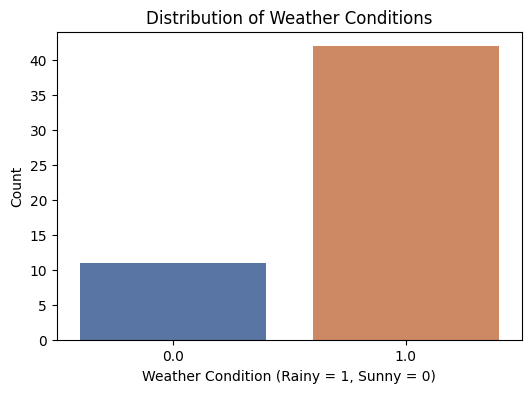

In [ ]:
def plot_weather_distribution():
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df['weather_condition'], palette="deep")
    plt.title("Distribution of Weather Conditions")
    plt.xlabel("Weather Condition (Rainy = 1, Sunny = 0)")
    plt.ylabel("Count")
    plt.show()

plot_weather_distribution()


In [ ]:
df['weather_condition'] = df['weather_condition'].map({'Rainy': 1, 'Sunny': 0})

In [ ]:
# Dropping date as it is not numerical
df.drop(columns=['date'], inplace=True)

# Splitting data into features and target
X = df.drop(columns=['weather_condition']).values
y = df['weather_condition'].values

In [ ]:
# Normalizing numerical features
X = (X - X.mean(axis=0)) / X.std(axis=0)


In [ ]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=5000): #epoch how mant times a datasetset is passed to model
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for epoch in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return (y_predicted >= 0.5).astype(int)

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)



In [ ]:
def train_test_split(X, y, test_size=0.2, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    split_idx = int(X.shape[0] * (1 - test_size))
    return X[indices[:split_idx]], X[indices[split_idx:]], y[indices[:split_idx]], y[indices[split_idx:]]

X_train, X_test, y_train, y_test = train_test_split(X, y)


In [ ]:
# Training the logistic regression model
model = LogisticRegressionScratch(learning_rate=0.01, epochs=5000)
model.fit(X_train, y_train)


In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [ ]:
def evaluate_model(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    print(f"Accuracy: {accuracy:.4f}")

evaluate_model(y_test, y_pred_test)

Accuracy: 1.0000


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X = df.drop('weather_condition', axis=1)  # Assuming 'weather_condition' is the target column
y = df['weather_condition']

X = imputer.fit_transform(X)

# Check again to ensure no missing values
print(pd.isnull(X).sum())

0


In [ ]:
# Encode the 'weather_condition' column
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
# Evaluate the final model
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# Evaluate the final model's performance
evaluate_model(y_test, y_pred_final)

Accuracy: 1.0
Confusion Matrix:
 [[11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
def cross_validation(X, y, learning_rates, epochs_list, k=5):
    np.random.seed(42)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    fold_size = len(X) // k
    best_hyperparams = None
    best_accuracy = 0

    for learning_rate in learning_rates:
        for epochs in epochs_list:
            accuracies = []

            for i in range(k):
                start, end = i * fold_size, (i + 1) * fold_size
                X_val, y_val = X[start:end], y[start:end]
                X_train_fold = np.concatenate((X[:start], X[end:]), axis=0)
                y_train_fold = np.concatenate((y[:start], y[end:]), axis=0)

                model = LogisticRegressionScratch(learning_rate=learning_rate, epochs=epochs)
                model.fit(X_train_fold, y_train_fold)
                y_pred_val = model.predict(X_val)
                acc = np.mean(y_val == y_pred_val)
                accuracies.append(acc)

            avg_accuracy = np.mean(accuracies)
            print(f"Learning rate: {learning_rate}, Epochs: {epochs}, Avg Accuracy: {avg_accuracy:.4f}")

            if avg_accuracy > best_accuracy:
                best_accuracy = avg_accuracy
                best_hyperparams = (learning_rate, epochs)

    return best_hyperparams


In [ ]:
learning_rates = [0.001, 0.09, 0.1]
epochs_list = [5000, 10000, 15000]
best_learning_rate, best_epochs = cross_validation(X_train, y_train, learning_rates, epochs_list)


Learning rate: 1e-05, Epochs: 5000, Avg Accuracy: 1.0000
Learning rate: 1e-05, Epochs: 10000, Avg Accuracy: 1.0000
Learning rate: 1e-05, Epochs: 15000, Avg Accuracy: 1.0000
Learning rate: 0.09, Epochs: 5000, Avg Accuracy: 1.0000
Learning rate: 0.09, Epochs: 10000, Avg Accuracy: 1.0000
Learning rate: 0.09, Epochs: 15000, Avg Accuracy: 1.0000
Learning rate: 0.1, Epochs: 5000, Avg Accuracy: 1.0000
Learning rate: 0.1, Epochs: 10000, Avg Accuracy: 1.0000
Learning rate: 0.1, Epochs: 15000, Avg Accuracy: 1.0000


In [ ]:
model_final = LogisticRegressionScratch(learning_rate=best_learning_rate, epochs=best_epochs)
model_final.fit(X_train, y_train)
y_pred_final = model_final.predict(X_test)


In [ ]:
evaluate_model(y_test, y_pred_final)

Accuracy: 1.0000
